In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

accident_csv = "./accident.csv"
vehicle_csv = "./vehicle.csv"
vehicle_vin_csv = "./Vin Combined Data.csv"

accident_df = pd.read_csv(accident_csv)
vehicle_vin_df = pd.read_csv(vehicle_vin_csv)
vehicle_df = pd.read_csv(vehicle_csv)


vehicle_combined_df = pd.merge(vehicle_df, vehicle_vin_df, on=["VIN"])
vehicle_combined_df.to_csv("./vehicle_data_combined.csv")
#vehicle_accident_combined_df = pd.merge(vehicle_combined_df, accident_df, on=["ST_CASE"]
    

/var/folders/g1/_j2d8jxs3c7_lb7t6vlb5r0c0000gn/T/ipykernel_60846/2163015511.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_vin_df = pd.read_csv(vehicle_vin_csv)
/var/folders/g1/_j2d8jxs3c7_lb7t6vlb5r0c0000gn/T/ipykernel_60846/2163015511.py:11: DtypeWarning: Columns (102,103,104,107,108,109,110,117,118,120,125,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(vehicle_csv)


In [4]:
vehicle_combined_df.value_counts("make")

make
FORD                      765
CHEVROLET                 751
TOYOTA                    445
HONDA                     369
DODGE                     347
                         ... 
MOTOR COACH INDUSTRIES      1
NAVISTAR                    1
OSHKOSH                     1
BOCATS                      1
PIERCE MANUFACTURING        1
Name: count, Length: 99, dtype: int64

In [5]:
vehicle_combined_df.value_counts("fueltypeprimary")

fueltypeprimary
Gasoline                       4176
Diesel                          464
Flexible Fuel Vehicle (FFV)     128
Ethanol (E85)                     9
Not Applicable                    5
Electric                          1
Name: count, dtype: int64

In [6]:
vehicle_combined_df.value_counts("model")

model
Silverado     184
F-150         169
Ram           144
Accord         93
Civic          93
             ... 
GSX750F         1
GSX-R750K       1
GSX-R1100W      1
GSF600S         1
Zephyr          1
Name: count, Length: 847, dtype: int64

In [7]:
vehicle_combined_df.value_counts("vehicletype")

vehicletype
PASSENGER CAR                           1943
TRUCK                                   1298
MULTIPURPOSE PASSENGER VEHICLE (MPV)    1233
MOTORCYCLE                               718
INCOMPLETE VEHICLE                       133
BUS                                       27
TRAILER                                    5
OFF ROAD VEHICLE                           2
Name: count, dtype: int64

In [9]:
vehicle_combined_df.value_counts("enginehp")

enginehp
170.0    107
70.0      69
200.0     68
160.0     64
140.0     63
        ... 
269.0      1
111.0      1
114.0      1
121.0      1
2.0        1
Name: count, Length: 256, dtype: int64

In [10]:
vehicle_combined_df.value_counts("bodyclass")

bodyclass
Sedan/Saloon                                                                                                     1472
Pickup                                                                                                           1033
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)                                                          1026
Truck-Tractor                                                                                                     244
Coupe                                                                                                             211
Motorcycle - Touring / Sport Touring                                                                              190
Motorcycle - Sport                                                                                                156
Hatchback/Liftback/Notchback                                                                                      154
Minivan                                       

Text(0.5, 1.0, 'Traveling Speed vs. Speed Limit Crashes')

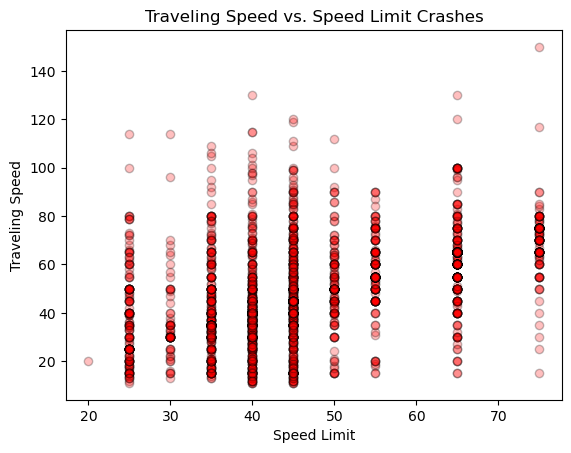

In [46]:
# cut out the near 100 speed limits get rid of NAs
vehicle_combined_df[["TRAV_SP", "VSPD_LIM", "SPEEDREL", "vehicletype"]]
speeding_df = vehicle_combined_df.loc[(vehicle_combined_df["TRAV_SP"] < 200) & (vehicle_combined_df["TRAV_SP"] > 10), ["TRAV_SP", "VSPD_LIM", "SPEEDREL", "vehicletype"]]
updated_speeding_df = speeding_df.loc[(speeding_df["VSPD_LIM"] > 15) & (speeding_df["VSPD_LIM"] < 85),["TRAV_SP", "VSPD_LIM", "SPEEDREL", "vehicletype"]]
#speeding_df["Speed Difference"] = speeding_df["TRAV_SP"] - speeding_df["VSPD_LIM"]
traveling_speed = updated_speeding_df["TRAV_SP"]
speed_limit = updated_speeding_df["VSPD_LIM"]
plt.scatter(speed_limit,traveling_speed, facecolors="red", marker="o", edgecolors="black", alpha=0.25)
plt.xlabel("Speed Limit")
plt.ylabel("Traveling Speed")
plt.title("Traveling Speed vs. Speed Limit Crashes")